In [6]:
###########################################
# IMPORTS
###########################################
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools.constants import kB
from openmmtools.integrators import LangevinIntegrator

from simtk import unit, openmm

from perses.dispersed.utils import configure_platform
from perses.annihilation.lambda_protocol import RESTState, RESTCapableRelativeAlchemicalState, RESTCapableLambdaProtocol
import numpy as np
import itertools
import copy

import pickle
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import mdtraj as md

from perses.tests.test_topology_proposal import generate_dipeptide_top_pos_sys, generate_atp
from perses.annihilation.relative import RESTCapableHybridTopologyFactory


#############################################
# CONSTANTS
#############################################
temperature = 300.0 * unit.kelvin
kT = kB * temperature
beta = 1.0/kT
REFERENCE_PLATFORM = openmm.Platform.getPlatformByName("CUDA")

## Generate htf

In [4]:
# Create a htf
atp, system_generator = generate_atp(phase = 'solvent')
topology_proposal, new_positions, _, _ = generate_dipeptide_top_pos_sys(atp.topology, 
                               'ILE', 
                               atp.system, 
                               atp.positions, 
                               system_generator,
                               flatten_torsions=True,
                               flatten_exceptions=True,
#                                 demap_CBs=True,
                               validate_endstate_energy=False)

DEBUG:openmmforcefields.system_generators:Trying GAFFTemplateGenerator to load gaff-2.11
INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:local_atom_map: {6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 14, 12: 15}
INFO:proposal_generator:the mapped atom names are: [('N', 'N'), ('H', 'H'), ('CA', 'CA'), ('HA', 'HA'), ('CB', 'CB'), ('C', 'C'), ('O', 'O')]
INFO:geometry:propose: performing forward proposal


making topology proposal
generating geometry engine
making geometry proposal from ALA to ILE


INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 12
INFO:geometry:Atom index proposal order is [14, 18, 21, 24, 15, 17, 20, 13, 16, 23, 19, 22]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 12 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 54 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 87 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 12 new atoms
INFO:geometry:	reduced angle potential = 0.04502321600564107.
INFO:geometry:	reduced angle potential = 0.20040890124301539.
INFO:geometry:	reduced angle potential = 0.20958126107705788.
INFO:geometry:	reduced angle potential = 0.0018835595935622399.
INFO:geometry:	reduced angle potential = 0.13508569152088892.
INFO:geometry:	reduced angle potential = 0.35472805219267933.
INFO:geometry:	reduced angle potential = 0.0007861615620868939.
INFO:geometry:	reduced angle potential = 1.5678329481832642.
INFO:geometry:	reduced angle potential = 0.11052633116175489.
INFO:geometry:	reduced angle potential = 0.2249679286147919.
INFO:geometry:	reduced angle potential = 0.17783122639193014.
INFO:geometry:	reduced angle potential = 0.44196831879553833.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'Mont

conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 16.81406823661637


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 28.447437515004776
INFO:geometry:final reduced energy 45.261504864933606
INFO:geometry:sum of energies: 45.261505751621144
INFO:geometry:magnitude of difference in the energies: 8.86687541168385e-07
INFO:geometry:Final logp_proposal: 82.35978365694152
INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 3
INFO:geometry:Atom index proposal order is [12, 13, 11]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology


added energy components: [('CustomBondForce', 0.18767092051157755), ('CustomAngleForce', 23.747770335950452), ('CustomTorsionForce', 8.961875678738854), ('CustomBondForce', -4.449879420196114)]


INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 9 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 36 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 42 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 1622 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (6, 8, 10, 11, [1, Quantity(value=2.10535

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions
INFO:geometry:There are 3 new atoms
INFO:geometry:	reduced angle potential = 3.205832446488702e-13.


conducting subsequent work with the following platform: CUDA


INFO:geometry:	reduced angle potential = 7.39096069988752e-11.
INFO:geometry:	reduced angle potential = 1.2915588460963948e-10.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 9 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:reverse final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 16.81406823661637


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 8.816525446865816
INFO:geometry:final reduced energy 25.63059342413189
INFO:geometry:sum of energies: 25.63059368348219
INFO:geometry:magnitude of difference in the energies: 2.593502959058469e-07
INFO:geometry:Final logp_proposal: -26861.37498271732


conducting subsequent work with the following platform: CUDA
added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 0.00017810081275281765), ('CustomTorsionForce', 0.004336815681512571), ('CustomBondForce', 8.812010530371548)]


In [7]:
htf = RESTCapableHybridTopologyFactory(topology_proposal=topology_proposal,
                     current_positions=atp.positions,
                     new_positions=new_positions,
                     generate_htf_for_testing=True
                    )

INFO:relative:*** Generating RESTCapableHybridTopologyFactory ***
INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:No unknown forces.
INFO:relative:r_cutoff is 1.0 nm
INFO:relative:alpha_ewald is 2.918423065872431
INFO:relative:w_scale is 0.1
INFO:relative:Set w_scale to 0 for testing
INFO:relative:Creating hybrid system
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:Added MonteCarloBarostat.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=2.56477354, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=2.56477354, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=2.56477354), 

In [8]:
with open("atp_solvent_scale_region_ile.pickle", "wb") as f:
    pickle.dump(htf, f)

# Run vanilla MD on ala dipeptide at lambda = 0

In [2]:
with open("atp_solvent_scale_region.pickle", "rb") as f:
    htf = pickle.load(f)
    hybrid_system = htf.hybrid_system
    hybrid_positions = htf.hybrid_positions
    box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()



INFO:rdkit:Enabling RDKit 2021.03.4 jupyter extensions


In [3]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 0
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

print(compound_thermodynamic_state.lambda_rest_bonds)
print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
print(compound_thermodynamic_state.lambda_alchemical_bonds_new)


1.0
1.0
0.0


In [4]:
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [5]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [6]:
energies, positions_old, positions_new = [], [], []

for _ in tqdm_notebook(range(1000)):
    integrator.step(250) 
    
    # Get energy and positions
    state = context.getState(getEnergy=True, getPositions=True)
    energies.append(state.getPotentialEnergy().value_in_unit_system(unit.md_unit_system))
    pos = state.getPositions(asNumpy=True)
    old_pos = np.asarray(htf.old_positions(pos))
    new_pos = np.asarray(htf.new_positions(pos))
    positions_old.append(old_pos)
    positions_new.append(new_pos)
    

/scratch/lsftmp/4045571.tmpdir/ipykernel_333590/1679595699.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
with open("ala_lambda_0_energies.npy", "wb") as f:
    np.save(f, energies)

with open("ala_lambda_0_old.npy", "wb") as f:
    np.save(f, positions_old)

with open("ala_lambda_0_new.npy", "wb") as f:
    np.save(f, positions_new)
    

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

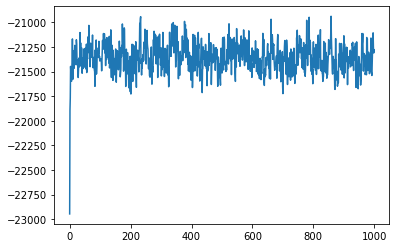

In [20]:
plt.plot(energies)
plt.show()


# Run vanilla MD on ala dipeptide at lambda = 0.5

In [8]:
with open("atp_solvent_scale_region.pickle", "rb") as f:
    htf = pickle.load(f)
    hybrid_system = htf.hybrid_system
    hybrid_positions = htf.hybrid_positions
    box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()



In [9]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 0.5
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

print(compound_thermodynamic_state.lambda_rest_bonds)
print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
print(compound_thermodynamic_state.lambda_alchemical_bonds_new)


0.7071067811865476
0.5
0.5


In [10]:
# Get energy
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [11]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [ ]:
energies, positions_old, positions_new = [], [], []

for _ in tqdm_notebook(range(1000)):
    integrator.step(250) 
    
    # Get energy and positions
    state = context.getState(getEnergy=True, getPositions=True)
    energies.append(state.getPotentialEnergy().value_in_unit_system(unit.md_unit_system))
    pos = state.getPositions(asNumpy=True)
    old_pos = np.asarray(htf.old_positions(pos))
    new_pos = np.asarray(htf.new_positions(pos))
    positions_old.append(old_pos)
    positions_new.append(new_pos)
    

/scratch/lsftmp/4043752.tmpdir/ipykernel_61267/1679595699.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [26]:
with open("ala_lambda_0.5_energies.npy", "wb") as f:
    np.save(f, energies)

with open("ala_lambda_0.5_old.npy", "wb") as f:
    np.save(f, positions_old)

with open("ala_lambda_0.5_new.npy", "wb") as f:
    np.save(f, positions_new)
    

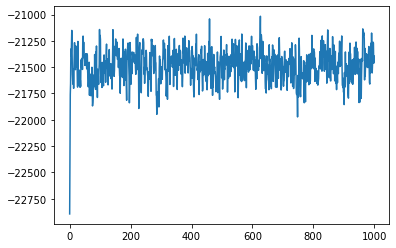

In [27]:
plt.plot(energies)
plt.show()


# Run vanilla MD on ala dipeptide at lambda = 1.0

In [9]:
with open("atp_solvent_scale_region_ile.pickle", "rb") as f:
    htf = pickle.load(f)
    hybrid_system = htf.hybrid_system
    hybrid_positions = htf.hybrid_positions
    box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()



In [80]:
for atom in htf.hybrid_topology.atoms:
    print(atom.index, atom)

0 ACE1-H1
1 ACE1-CH3
2 ACE1-H2
3 ACE1-H3
4 ACE1-C
5 ACE1-O
6 ALA2-N
7 ALA2-H
8 ALA2-CA
9 ALA2-HA
10 ALA2-CB
11 ALA2-HB1
12 ALA2-HB2
13 ALA2-HB3
14 ALA2-C
15 ALA2-O
1548 ALA2-HB
1549 ALA2-CG2
1550 ALA2-HG21
1551 ALA2-HG22
1552 ALA2-HG23
1553 ALA2-OG1
1554 ALA2-HG1
16 NME3-N
17 NME3-H
18 NME3-C
19 NME3-H1
20 NME3-H2
21 NME3-H3
22 HOH4-O
23 HOH4-H1
24 HOH4-H2
25 HOH5-O
26 HOH5-H1
27 HOH5-H2
28 HOH6-O
29 HOH6-H1
30 HOH6-H2
31 HOH7-O
32 HOH7-H1
33 HOH7-H2
34 HOH8-O
35 HOH8-H1
36 HOH8-H2
37 HOH9-O
38 HOH9-H1
39 HOH9-H2
40 HOH10-O
41 HOH10-H1
42 HOH10-H2
43 HOH11-O
44 HOH11-H1
45 HOH11-H2
46 HOH12-O
47 HOH12-H1
48 HOH12-H2
49 HOH13-O
50 HOH13-H1
51 HOH13-H2
52 HOH14-O
53 HOH14-H1
54 HOH14-H2
55 HOH15-O
56 HOH15-H1
57 HOH15-H2
58 HOH16-O
59 HOH16-H1
60 HOH16-H2
61 HOH17-O
62 HOH17-H1
63 HOH17-H2
64 HOH18-O
65 HOH18-H1
66 HOH18-H2
67 HOH19-O
68 HOH19-H1
69 HOH19-H2
70 HOH20-O
71 HOH20-H1
72 HOH20-H2
73 HOH21-O
74 HOH21-H1
75 HOH21-H2
76 HOH22-O
77 HOH22-H1
78 HOH22-H2
79 HOH23-O
80 HOH23-H1
81 

In [92]:
sterics_force = hybrid_system.getForce(5)
for i in range(sterics_force.getNumParticles()):
    print(i, sterics_force.getParticleParameters(i))
 

0 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2649532787749369, 0.2649532787749369, 0.06568879999999999, 0.06568879999999999)
1 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.3399669508423535, 0.3399669508423535, 0.4577296, 0.4577296)
2 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2649532787749369, 0.2649532787749369, 0.06568879999999999, 0.06568879999999999)
3 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2649532787749369, 0.2649532787749369, 0.06568879999999999, 0.06568879999999999)
4 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.3399669508423535, 0.3399669508423535, 0.359824, 0.359824)
5 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2959921901149463, 0.2959921901149463, 0.87864, 0.87864)
6 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.3249998523775958, 0.3249998523775958, 0.7112800000000001, 0.7112800000000001)
7 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.10690784617684071, 0.10690784617684071, 0.06568879999999999, 0.06568879999999999)
8 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.3399669508423535, 0.3399669508423535, 0.4577296, 0.4577296)
9 (1.0

1366 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.3150752406575124, 0.3150752406575124, 0.635968, 0.635968)
1367 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1368 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1369 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.3150752406575124, 0.3150752406575124, 0.635968, 0.635968)
1370 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1371 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1372 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.3150752406575124, 0.3150752406575124, 0.635968, 0.635968)
1373 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1374 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1375 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.3150752406575124, 0.3150752406575124, 0.635968, 0.635968)
1376 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1377 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0)
1378 (0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.3150752406575124, 0.3150752406575124, 0.635968, 0.635968)
1379 (0

In [91]:
electrostatics_force = hybrid_system.getForce(4)
for i in range(electrostatics_force.getNumParticles()):
    print(i, electrostatics_force.getParticleParameters(i))
 

0 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.1123, 0.1123)
1 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.3662, -0.3662)
2 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.1123, 0.1123)
3 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.1123, 0.1123)
4 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.5972, 0.5972)
5 (0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.5679, -0.5679)
6 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.4157, -0.4157)
7 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2719, 0.2719)
8 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0337, -0.0389)
9 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0823, 0.1007)
10 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.0, 0.0)
11 (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0603, 0.0)
12 (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0603, 0.0)
13 (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0603, 0.0)
14 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.5973, 0.5973)
15 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.5679, -0.5679)
16 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -0.4157, -0.4157)
17 (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.2719, 0.2719)
18 (0.0, 1.0, 0.0, 0.0,

In [90]:
electrostatics_force = hybrid_system.getForce(4)
sterics_force = hybrid_system.getForce(5)

for i in [10, 1548]:
    params = sterics_force.getParticleParameters(i)
    params = list(params)
    params[-1] = params[-1]*0
    params[-2] = params[-2]*0
    sterics_force.setParticleParameters(i, params)

    params = electrostatics_force.getParticleParameters(i)
    params = list(params)
    params[-1] = params[-1]*0
    params[-2] = params[-2]*0
    electrostatics_force.setParticleParameters(i, params)


In [10]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 1
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

# print(compound_thermodynamic_state.lambda_rest_bonds)
# print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
# print(compound_thermodynamic_state.lambda_alchemical_bonds_new)
# print(compound_thermodynamic_state.lambda_alchemical_electrostatics_reciprocal)
# print(compound_thermodynamic_state.lambda_alchemical_sterics_old)
# print(compound_thermodynamic_state.lambda_alchemical_sterics_exceptions_old)
# print(compound_thermodynamic_state.lambda_alchemical_sterics_new)
# print(compound_thermodynamic_state.lambda_alchemical_sterics_exceptions_new)

In [94]:
# compound_thermodynamic_state.lambda_alchemical_electrostatics_reciprocal = 0
# compound_thermodynamic_state.lambda_alchemical_electrostatics_new = 0
# compound_thermodynamic_state.lambda_alchemical_electrostatics_exceptions_new = 0
# compound_thermodynamic_state.lambda_alchemical_sterics_new = 0
# compound_thermodynamic_state.lambda_alchemical_sterics_exceptions_new = 0

In [11]:
# Get energy
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [12]:
for k, v in context.getParameters().items():
    print(k, v)

MonteCarloPressure 1.01325
MonteCarloTemperature 300.0
lambda_alchemical_angles_new 1.0
lambda_alchemical_angles_old 0.0
lambda_alchemical_bonds_new 1.0
lambda_alchemical_bonds_old 0.0
lambda_alchemical_electrostatics_exceptions_new 1.0
lambda_alchemical_electrostatics_exceptions_old 0.0
lambda_alchemical_electrostatics_new 1.0
lambda_alchemical_electrostatics_old 0.0
lambda_alchemical_electrostatics_reciprocal 1.0
lambda_alchemical_sterics_exceptions_new 1.0
lambda_alchemical_sterics_exceptions_old 0.0
lambda_alchemical_sterics_new 1.0
lambda_alchemical_sterics_old 0.0
lambda_alchemical_torsions_new 1.0
lambda_alchemical_torsions_old 0.0
lambda_rest_angles 1.0
lambda_rest_bonds 1.0
lambda_rest_electrostatics 1.0
lambda_rest_electrostatics_exceptions 1.0
lambda_rest_sterics 1.0
lambda_rest_sterics_exceptions 1.0
lambda_rest_torsions 1.0


In [13]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [14]:
energies, positions_old, positions_new = [], [], []

# for _ in tqdm_notebook(range(1000)):
#     integrator.step(250) 

for step in tqdm_notebook(range(250000)):
    integrator.step(1) 
    
#     if step > 32450:
    
#         # Get energy and positions
#         state = context.getState(getEnergy=True, getPositions=True)
#         energies.append(state.getPotentialEnergy().value_in_unit_system(unit.md_unit_system))
#         pos = state.getPositions(asNumpy=True)
#         old_pos = np.asarray(htf.old_positions(pos))
#         new_pos = np.asarray(htf.new_positions(pos))
#         positions_old.append(old_pos)
#         positions_new.append(new_pos)


/scratch/lsftmp/4056544.tmpdir/ipykernel_26501/174851586.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm_notebook(range(250000)):


  0%|          | 0/250000 [00:00<?, ?it/s]

OpenMMException: Particle coordinate is nan

In [14]:
htf._atom_classes['core_atoms']

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 21}

In [48]:
with open("ala_lambda_1_energies.npy", "wb") as f:
    np.save(f, energies)

with open("ala_lambda_1_old.npy", "wb") as f:
    np.save(f, positions_old)

with open("ala_lambda_1_new.npy", "wb") as f:
    np.save(f, positions_new)
    

In [24]:
with open("ala_lambda_1_energies.npy", "rb") as f:
    energies = np.load(f)

with open("ala_lambda_1_old.npy", "rb") as f:
    positions_old = np.load(f)

with open("ala_lambda_1_new.npy", "rb") as f:
    positions_new = np.load(f)
    

In [65]:
htf._atom_classes['unique_old_atoms']

{11, 12, 13}

In [66]:
htf._atom_classes['unique_new_atoms']

{1557, 1558, 1559, 1560, 1561, 1562, 1563}

In [71]:
htf._atom_classes['core_atoms']

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 21}

In [73]:
htf._rest_region

[4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 16,
 17]

In [69]:
for i in {1557, 1558, 1559, 1560, 1561, 1562, 1563}:
    print(htf._hybrid_to_new_map[i])

13
14
15
16
17
18
19


In [27]:
for i, p in enumerate(positions_old[832]):
    print(i, p)

0 [1.13244556 0.55652141 2.28663996]
1 [1.07900205 0.55184162 2.38152352]
2 [1.14033025 0.53751803 2.47048804]
3 [1.00806764 0.47122096 2.36282544]
4 [0.99862295 0.67587739 2.37895184]
5 [1.06399186 0.77622366 2.42303299]
6 [0.87201025 0.6959791  2.35896365]
7 [0.81766082 0.61102317 2.36440683]
8 [0.79702673 0.81253633 2.35865006]
9 [0.81027485 0.86085295 2.26184618]
10 [1.30564917e+26 7.51942798e+25 1.26121162e+26]
11 [-9.22637897e+25 -5.17155748e+25 -1.01902633e+26]
12 [ 3.39410124e+24  2.24396021e+24 -1.03258254e+24]
13 [ 1.12894740e+24  5.70800545e+23 -8.12762078e+22]
14 [0.81609392 0.91399081 2.4773637 ]
15 [0.80949508 0.85503738 2.59131094]
16 [0.85082855 1.03839137 2.4278299 ]
17 [0.85786114 1.07979988 2.33597742]
18 [0.89158322 1.14102202 2.52581924]
19 [0.88482796 1.23914705 2.47884217]
20 [0.80987499 1.14876232 2.59754687]
21 [0.98688678 1.14034972 2.57871328]
22 [0.55492722 1.41952702 1.35984498]
23 [0.62076201 1.36345472 1.40088151]
24 [0.51920492 1.47133732 1.43196937]
25 

423 [0.55878392 2.17585323 0.12968659]
424 [0.73946254 0.01032132 0.52658724]
425 [0.79322403 0.08381294 0.49707449]
426 [ 0.76248118 -0.06146297  0.46760017]
427 [0.89244473 1.98759211 2.25876514]
428 [0.96767704 1.96387939 2.20454222]
429 [0.82184757 2.00365808 2.19615328]
430 [1.54702671 1.88341211 0.61967255]
431 [1.55286626 1.94982732 0.5509904 ]
432 [1.47113983 1.83037212 0.5953773 ]
433 [2.18256765 0.11417126 1.49627773]
434 [2.23254705 0.07377302 1.42533861]
435 [2.24169924 0.11206541 1.57151959]
436 [2.42932701 1.76947945 2.28033408]
437 [2.48696664 1.84589492 2.28115116]
438 [2.3432856  1.80406473 2.30406282]
439 [1.32749241 1.34154441 0.92828631]
440 [1.42219241 1.34425789 0.94195616]
441 [1.31485005 1.37783424 0.84061911]
442 [2.35254719 2.29678607 0.73205192]
443 [2.38491875 2.21918414 0.77779402]
444 [2.28460324 2.33195336 0.78957757]
445 [0.41600909 0.71030759 0.53509163]
446 [0.45574226 0.63233657 0.49630872]
447 [0.3343544  0.72227912 0.48659925]
448 [1.1808086 0.06994

821 [2.52628626 1.30553988 1.54140418]
822 [2.44051475 1.28395763 1.41853675]
823 [2.43365249 0.67038118 2.45380564]
824 [2.39376154 0.59417176 2.41181571]
825 [2.38109834 0.68466082 2.53252331]
826 [1.6510179  2.40003947 1.32398156]
827 [1.7055763  2.47780624 1.31223299]
828 [1.65378618 2.38277584 1.41809119]
829 [1.08229673 1.64619139 0.38986512]
830 [1.07488426 1.61178476 0.47887948]
831 [0.99327477 1.67289524 0.36696724]
832 [1.32763149 2.24597014 1.02058989]
833 [1.37323634 2.23579047 1.10412964]
834 [1.39745945 2.26041431 0.9567327 ]
835 [0.48291499 0.95656756 0.23323234]
836 [0.51894315 0.92878282 0.31744813]
837 [0.50838492 1.04850291 0.22539067]
838 [1.04076303 0.88539918 0.98229956]
839 [1.09087568 0.92396486 1.05415865]
840 [0.95553895 0.92877727 0.98648471]
841 [1.87512812 2.18254422 0.90853166]
842 [1.9616881  2.15119097 0.93473588]
843 [1.87721784 2.18160318 0.81283911]
844 [1.7853231  2.22317416 0.2818736 ]
845 [1.87648134 2.24663352 0.26449108]
846 [1.73438587 2.2814756

1209 [0.47170689 2.04217155 1.05407389]
1210 [2.48982272 0.62268058 1.46215313]
1211 [2.53683264 0.5445552  1.43301877]
1212 [2.55552828 0.69226581 1.46042315]
1213 [2.2434655  1.94099469 1.91076932]
1214 [2.1914622  1.94022667 1.99112717]
1215 [2.18287005 1.97154095 1.84326054]
1216 [2.01943506 2.37088066 0.18706711]
1217 [2.09630423 2.40729422 0.1431638 ]
1218 [1.94503857 2.40503471 0.13745883]
1219 [0.16639804 0.37083309 1.97602643]
1220 [0.21060281 0.43208068 2.03482261]
1221 [0.13284704 0.30218956 2.03368677]
1222 [2.47924943 0.11892718 0.91689679]
1223 [2.41492357 0.08615636 0.85404319]
1224 [2.50401117 0.20503335 0.88320846]
1225 [1.57235021 1.7708683  2.38175064]
1226 [1.54300441 1.74760845 2.29365909]
1227 [1.63328627 1.70112692 2.40594268]
1228 [1.03194551 2.13266013 0.7909011 ]
1229 [1.05118656 2.21564359 0.7472451 ]
1230 [0.94507843 2.10829507 0.75892028]
1231 [1.55635806 2.06567837 0.38152625]
1232 [1.64549679 2.08874149 0.35535952]
1233 [1.50514408 2.07260488 0.30095659]


In [29]:
for i, p in enumerate(positions_new[832]):
    print(i, p)

0 [1.13244556 0.55652141 2.28663996]
1 [1.07900205 0.55184162 2.38152352]
2 [1.14033025 0.53751803 2.47048804]
3 [1.00806764 0.47122096 2.36282544]
4 [0.99862295 0.67587739 2.37895184]
5 [1.06399186 0.77622366 2.42303299]
6 [0.87201025 0.6959791  2.35896365]
7 [0.81766082 0.61102317 2.36440683]
8 [0.79702673 0.81253633 2.35865006]
9 [0.81027485 0.86085295 2.26184618]
10 [1.30564917e+26 7.51942798e+25 1.26121162e+26]
11 [0.81609392 0.91399081 2.4773637 ]
12 [0.80949508 0.85503738 2.59131094]
13 [-1.12927482e+25 -8.13404716e+24  7.35358989e+24]
14 [0.53673474 0.88842214 2.37766388]
15 [0.53140873 0.95805274 2.2939727 ]
16 [0.43442031 0.85320882 2.39080847]
17 [0.56240491 0.95406674 2.4608073 ]
18 [0.60701936 0.69202515 2.25516227]
19 [0.66658881 0.70323787 2.18071929]
20 [0.85082855 1.03839137 2.4278299 ]
21 [0.85786114 1.07979988 2.33597742]
22 [0.89158322 1.14102202 2.52581924]
23 [0.88482796 1.23914705 2.47884217]
24 [0.80987499 1.14876232 2.59754687]
25 [0.98688678 1.14034972 2.57871

421 [0.92782396 0.63257655 0.28987714]
422 [0.09706791 1.98419343 1.8023994 ]
423 [0.12827421 1.97804777 1.71211809]
424 [0.03534278 2.05734785 1.80152837]
425 [0.52631162 2.08758261 0.11190553]
426 [0.53821378 2.04055773 0.19442413]
427 [0.55878392 2.17585323 0.12968659]
428 [0.73946254 0.01032132 0.52658724]
429 [0.79322403 0.08381294 0.49707449]
430 [ 0.76248118 -0.06146297  0.46760017]
431 [0.89244473 1.98759211 2.25876514]
432 [0.96767704 1.96387939 2.20454222]
433 [0.82184757 2.00365808 2.19615328]
434 [1.54702671 1.88341211 0.61967255]
435 [1.55286626 1.94982732 0.5509904 ]
436 [1.47113983 1.83037212 0.5953773 ]
437 [2.18256765 0.11417126 1.49627773]
438 [2.23254705 0.07377302 1.42533861]
439 [2.24169924 0.11206541 1.57151959]
440 [2.42932701 1.76947945 2.28033408]
441 [2.48696664 1.84589492 2.28115116]
442 [2.3432856  1.80406473 2.30406282]
443 [1.32749241 1.34154441 0.92828631]
444 [1.42219241 1.34425789 0.94195616]
445 [1.31485005 1.37783424 0.84061911]
446 [2.35254719 2.2967

800 [2.03548705 1.39863302 1.72039537]
801 [2.08945822 1.32542412 1.69056438]
802 [1.96609367 1.35776978 1.7721358 ]
803 [0.8524357 1.1238707 1.8009931]
804 [0.85461964 1.03663085 1.84032194]
805 [0.84389877 1.18351777 1.87536827]
806 [0.09224767 1.60001699 0.42697584]
807 [0.0610547  1.53337185 0.36575703]
808 [0.13182912 1.66708419 0.3713196 ]
809 [1.23149679 2.38105335 0.39167391]
810 [1.25905424 2.29401986 0.42045023]
811 [1.31259425 2.42426283 0.36486977]
812 [0.26585873 1.39728323 2.23217298]
813 [0.18769289 1.39415134 2.17701311]
814 [0.31861045 1.32281485 2.20329332]
815 [0.81105151 2.32480163 0.35432758]
816 [0.87470489 2.35779577 0.29090872]
817 [0.82978034 2.23114299 0.36062104]
818 [0.5595599  1.32539323 2.48353714]
819 [0.6310016  1.3877073  2.47029481]
820 [0.53523342 1.29764951 2.39521485]
821 [2.44229907 2.21321337 0.44742218]
822 [2.40094551 2.28127429 0.39431935]
823 [2.46180433 2.25625923 0.5306623 ]
824 [2.47121776 1.24036064 1.49802855]
825 [2.52628626 1.30553988 1

1209 [0.08240039 2.53009602 0.59256829]
1210 [0.0371041  2.41234611 0.67624718]
1211 [0.55762205 2.01601308 1.02095836]
1212 [0.61774434 2.03423669 1.09317698]
1213 [0.47170689 2.04217155 1.05407389]
1214 [2.48982272 0.62268058 1.46215313]
1215 [2.53683264 0.5445552  1.43301877]
1216 [2.55552828 0.69226581 1.46042315]
1217 [2.2434655  1.94099469 1.91076932]
1218 [2.1914622  1.94022667 1.99112717]
1219 [2.18287005 1.97154095 1.84326054]
1220 [2.01943506 2.37088066 0.18706711]
1221 [2.09630423 2.40729422 0.1431638 ]
1222 [1.94503857 2.40503471 0.13745883]
1223 [0.16639804 0.37083309 1.97602643]
1224 [0.21060281 0.43208068 2.03482261]
1225 [0.13284704 0.30218956 2.03368677]
1226 [2.47924943 0.11892718 0.91689679]
1227 [2.41492357 0.08615636 0.85404319]
1228 [2.50401117 0.20503335 0.88320846]
1229 [1.57235021 1.7708683  2.38175064]
1230 [1.54300441 1.74760845 2.29365909]
1231 [1.63328627 1.70112692 2.40594268]
1232 [1.03194551 2.13266013 0.7909011 ]
1233 [1.05118656 2.21564359 0.7472451 ]


In [81]:
for atom in htf._topology_proposal.new_topology.atoms():
    print(atom.index, atom)

0 <Atom 0 (H1) of chain 0 residue 0 (ACE)>
1 <Atom 1 (CH3) of chain 0 residue 0 (ACE)>
2 <Atom 2 (H2) of chain 0 residue 0 (ACE)>
3 <Atom 3 (H3) of chain 0 residue 0 (ACE)>
4 <Atom 4 (C) of chain 0 residue 0 (ACE)>
5 <Atom 5 (O) of chain 0 residue 0 (ACE)>
6 <Atom 6 (N) of chain 0 residue 1 (THR)>
7 <Atom 7 (H) of chain 0 residue 1 (THR)>
8 <Atom 8 (CA) of chain 0 residue 1 (THR)>
9 <Atom 9 (HA) of chain 0 residue 1 (THR)>
10 <Atom 10 (CB) of chain 0 residue 1 (THR)>
11 <Atom 11 (C) of chain 0 residue 1 (THR)>
12 <Atom 12 (O) of chain 0 residue 1 (THR)>
13 <Atom 13 (HB) of chain 0 residue 1 (THR)>
14 <Atom 14 (CG2) of chain 0 residue 1 (THR)>
15 <Atom 15 (HG21) of chain 0 residue 1 (THR)>
16 <Atom 16 (HG22) of chain 0 residue 1 (THR)>
17 <Atom 17 (HG23) of chain 0 residue 1 (THR)>
18 <Atom 18 (OG1) of chain 0 residue 1 (THR)>
19 <Atom 19 (HG1) of chain 0 residue 1 (THR)>
20 <Atom 20 (N) of chain 0 residue 2 (NME)>
21 <Atom 21 (H) of chain 0 residue 2 (NME)>
22 <Atom 22 (C) of chain 0 r

In [57]:
for atom in htf._topology_proposal.old_topology.atoms():
    print(atom.index, atom)

0 <Atom 0 (H1) of chain 0 residue 0 (ACE)>
1 <Atom 1 (CH3) of chain 0 residue 0 (ACE)>
2 <Atom 2 (H2) of chain 0 residue 0 (ACE)>
3 <Atom 3 (H3) of chain 0 residue 0 (ACE)>
4 <Atom 4 (C) of chain 0 residue 0 (ACE)>
5 <Atom 5 (O) of chain 0 residue 0 (ACE)>
6 <Atom 6 (N) of chain 0 residue 1 (ALA)>
7 <Atom 7 (H) of chain 0 residue 1 (ALA)>
8 <Atom 8 (CA) of chain 0 residue 1 (ALA)>
9 <Atom 9 (HA) of chain 0 residue 1 (ALA)>
10 <Atom 10 (CB) of chain 0 residue 1 (ALA)>
11 <Atom 11 (HB1) of chain 0 residue 1 (ALA)>
12 <Atom 12 (HB2) of chain 0 residue 1 (ALA)>
13 <Atom 13 (HB3) of chain 0 residue 1 (ALA)>
14 <Atom 14 (C) of chain 0 residue 1 (ALA)>
15 <Atom 15 (O) of chain 0 residue 1 (ALA)>
16 <Atom 16 (N) of chain 0 residue 2 (NME)>
17 <Atom 17 (H) of chain 0 residue 2 (NME)>
18 <Atom 18 (C) of chain 0 residue 2 (NME)>
19 <Atom 19 (H1) of chain 0 residue 2 (NME)>
20 <Atom 20 (H2) of chain 0 residue 2 (NME)>
21 <Atom 21 (H3) of chain 0 residue 2 (NME)>
22 <Atom 22 (O) of chain 1 residue 

1526 <Atom 1526 (H1) of chain 1 residue 504 (HOH)>
1527 <Atom 1527 (H2) of chain 1 residue 504 (HOH)>
1528 <Atom 1528 (O) of chain 1 residue 505 (HOH)>
1529 <Atom 1529 (H1) of chain 1 residue 505 (HOH)>
1530 <Atom 1530 (H2) of chain 1 residue 505 (HOH)>
1531 <Atom 1531 (O) of chain 1 residue 506 (HOH)>
1532 <Atom 1532 (H1) of chain 1 residue 506 (HOH)>
1533 <Atom 1533 (H2) of chain 1 residue 506 (HOH)>
1534 <Atom 1534 (O) of chain 1 residue 507 (HOH)>
1535 <Atom 1535 (H1) of chain 1 residue 507 (HOH)>
1536 <Atom 1536 (H2) of chain 1 residue 507 (HOH)>
1537 <Atom 1537 (O) of chain 1 residue 508 (HOH)>
1538 <Atom 1538 (H1) of chain 1 residue 508 (HOH)>
1539 <Atom 1539 (H2) of chain 1 residue 508 (HOH)>
1540 <Atom 1540 (O) of chain 1 residue 509 (HOH)>
1541 <Atom 1541 (H1) of chain 1 residue 509 (HOH)>
1542 <Atom 1542 (H2) of chain 1 residue 509 (HOH)>
1543 <Atom 1543 (O) of chain 1 residue 510 (HOH)>
1544 <Atom 1544 (H1) of chain 1 residue 510 (HOH)>
1545 <Atom 1545 (H2) of chain 1 resid

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

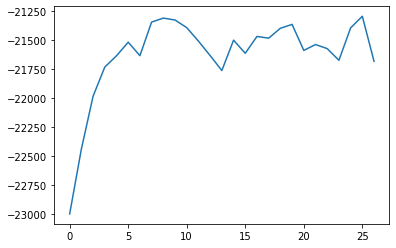

In [8]:
plt.plot(energies)
plt.show()


## Generate dcds

In [51]:
with open("ala_lambda_1_old.npy", 'rb') as f:
    old = np.load(f)

traj = md.Trajectory(np.array(old), md.Topology.from_openmm(htf._topology_proposal.old_topology))
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])
vectors = np.array([box_vectors]) 
traj.unitcell_vectors = np.repeat(vectors, 887, axis=0)
traj = traj.image_molecules()
traj.save("ala_lambda_1_old.dcd")
traj[0].save("ala_lambda_1_old.pdb")

In [52]:
with open("ala_lambda_1_new.npy", 'rb') as f:
    new = np.load(f)

traj = md.Trajectory(np.array(new), md.Topology.from_openmm(htf._topology_proposal.new_topology))
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])
vectors = np.array([box_vectors]) 
traj.unitcell_vectors = np.repeat(vectors, 887, axis=0)
traj = traj.image_molecules()
traj.save("ala_lambda_1_new.dcd")
traj[0].save("ala_lambda_1_new.pdb")

In [ ]:
with open("ala_lambda_0.5_old.npy", 'rb') as f:
    old = np.load(f)

traj = md.Trajectory(np.array(old), md.Topology.from_openmm(htf._topology_proposal.old_topology))
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])
vectors = np.array([box_vectors]) 
traj.unitcell_vectors = np.repeat(vectors, 1000, axis=0)
traj = traj.image_molecules()
traj.save("ala_lambda_0.5_old.dcd")
traj[0].save("ala_lambda_0.5_old.pdb")

In [ ]:
with open("ala_lambda_0.5_new.npy", 'rb') as f:
    new = np.load(f)

traj = md.Trajectory(np.array(new), md.Topology.from_openmm(htf._topology_proposal.new_topology))
box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])
vectors = np.array([box_vectors]) 
traj.unitcell_vectors = np.repeat(vectors, 1000, axis=0)
traj = traj.image_molecules()
traj.save("ala_lambda_0.5_new.dcd")
traj[0].save("ala_lambda_0.5_new.pdb")